In [2]:
import pandas as pd
# from nltk import ngrams
from IPython.display import clear_output
import glob
import time
import re
import gc
import sys
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import itertools
import json
import tensorflow as tf
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

In [3]:
filename = glob.glob('*json')

In [5]:
sub_filename = filename[:10]

In [6]:
def read_json(filename):
    file = []
    start = time.time()
    for i in filename:
        x = pd.read_json(i, lines=True)
        file.append(x)
    data = pd.concat(file, axis=0, ignore_index=True)
    gc.collect()
    end = time.time()
    print(end - start)
    return(data)

In [7]:
test_news = read_json(filename)

103.05273604393005


In [8]:
test_news.head()

,articles,avgAuthority,avgSimToC,canonicalized,centroid,clusterEntities,clusterSize,clusterid,containsWCEPArticle,date,density100,density75,density90,maxMinSimToC,medSimtoC,numUniqueSrcCountries,wikiStoryName,wikiStoryNameScore
0,[{'title': 'Medina eyes poultry for petroleum ...,0.000015,0.000000,1,{'title': 'Medina eyes poultry for petroleum a...,"[{'entity': 'Managua', 'frequency': 1.0}, {'en...",1,201306284079,0,20130628,0.000000,0.000000,0.000000,0.000000,0.000000,1,Hurricane_Alex_(2010),0.000050
1,[{'title': 'Rezoning plan for Buehlerâ€™s groc...,0.000015,0.000000,0,{'title': 'Kasich may veto funds for homeless ...,"[{'entity': 'Will Eisner', 'frequency': 2.0}]",2,201306284339,0,20130628,0.000000,0.000000,0.000000,1.000000,0.000000,1,None,0.000000
2,[{'title': 'Good Samaritan who saved drowning ...,0.000015,0.000000,0,{'title': 'Good Samaritan who saved drowning g...,"[{'entity': 'Human Rights Watch', 'frequency':...",1,201306282768,0,20130628,0.000000,0.000000,0.000000,0.000000,0.000000,1,None,0.000000
3,[{'title': 'domain-b.com : 'Bad English' saved...,0.000015,0.519231,0,{'title': 'Poor English saved Japan banks from...,"[{'entity': 'TarÅ� AsÅ�', 'frequency': 2.0}, {...",2,201306282606,0,20130628,0.000000,0.000000,0.000000,1.000000,1.000000,2,None,0.000000
4,"[{'title': 'â€˜White seaâ€™ seminar in Malta',...",0.000015,0.173587,1,{'title': 'Azeris push forward with gas pipeli...,"[{'entity': 'Albania', 'frequency': 3.0}, {'en...",5,201306281856,0,20130628,0.007463,0.029944,0.029944,0.029851,0.206349,3,Cyprusâ€“Israel_relations,0.001845


In [14]:
test_news.drop(test_news.index[:1], inplace=True)

test_news.index = pd.RangeIndex(len(test_news.index))

In [16]:
# Taking out number of entites from articles
start = time.time()
lst = []
for i in range(len(test_news)):
    x = 0
    count = 0
    for j in range(len(test_news.articles[i])):
        if test_news.articles[i][j]['numEntities'] != 0:
                count += 1
                x += test_news.articles[i][j]['numEntities'] / count
    lst.append(x)
print(time.time()-start)

170.9402928352356


In [172]:
test_news['articles_entities'] = lst

In [173]:
test_news.describe()

,avgAuthority,avgSimToC,canonicalized,clusterSize,clusterid,containsWCEPArticle,date,density100,density75,density90,maxMinSimToC,medSimtoC,numUniqueSrcCountries,wikiStoryNameScore,articles_entities
count,916554.000000,916554.000000,916554.000000,916554.000000,9.165540e+05,916554.000000,9.165540e+05,916554.000000,916554.000000,916554.000000,916554.000000,916554.000000,916554.000000,916554.000000,916554.000000
mean,0.003075,0.104632,0.333559,4.346054,4.229974e+11,0.018113,2.013995e+07,0.020727,0.019708,0.016893,0.138490,0.088075,1.933825,0.001013,4.289420
std,0.016234,0.187650,0.471485,14.169125,6.227919e+11,0.133362,2.833079e+03,0.068999,0.071283,0.067146,0.265081,0.200340,2.338886,0.005444,8.454104
min,0.000015,0.000000,0.000000,1.000000,2.013063e+08,0.000000,2.013063e+07,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000015,0.000000,0.000000,1.000000,2.014041e+11,0.000000,2.014051e+07,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.500000
50%,0.000015,0.000000,0.000000,2.000000,2.014081e+11,0.000000,2.014082e+07,0.000000,0.000000,0.000000,0.021858,0.000000,1.000000,0.000000,2.666667
75%,0.000015,0.129594,1.000000,3.000000,2.014112e+11,0.000000,2.014103e+07,0.003937,0.000000,0.000000,0.114924,0.076581,2.000000,0.000149,5.000000
max,0.225089,1.000000,1.000000,1140.000000,2.014123e+12,1.000000,2.014123e+07,0.500000,0.500000,0.500000,1.000000,1.000000,59.000000,0.387648,946.000000


In [174]:
# Taking out entites from centroid
numEntities = []
for i in range(len(test_news)):
    numEntities.append(test_news.centroid[i]['numEntities'])
test_news['numEntities'] = numEntities

## PCA FOR VISUALIZATION

In [196]:
#drop catagorical and target columns for visualization
data = test_news.drop(['articles','centroid','wikiStoryName','clusterEntities','clusterid','date','containsWCEPArticle'], axis=1)
label = test_news.containsWCEPArticle
sc = StandardScaler()
X = sc.fit_transform(data)

C:\Users\247987\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\247987\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [197]:
#create a dataframe to visualize in 2-D graph
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PCA_1', 'PCA_2'])

In [198]:
finalDf = pd.concat([principalDf, label], axis = 1)

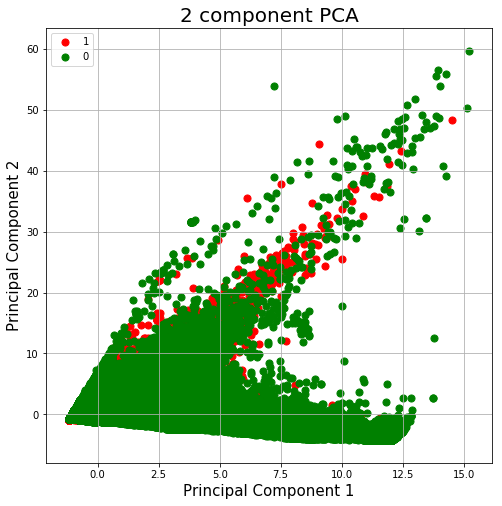

In [199]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [1, 0]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['containsWCEPArticle'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PCA_1']
               , finalDf.loc[indicesToKeep, 'PCA_2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [200]:
outliers1 = finalDf.loc[finalDf.PCA_2 > 60].index
outliers2 = finalDf.loc[finalDf.PCA_1 > 15].index

In [201]:
test_news.drop(test_news.index[outliers1], inplace=True)
test_news.drop(test_news.index[outliers2], inplace=True)


In [202]:
test_news.index = pd.RangeIndex(len(test_news.index))

### Visualization

In [91]:
visualize = test_news.drop(['articles','centroid','wikiStoryName','clusterEntities','clusterid','date'],axis=1)[:2000]

C:\Users\247987\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\247987\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


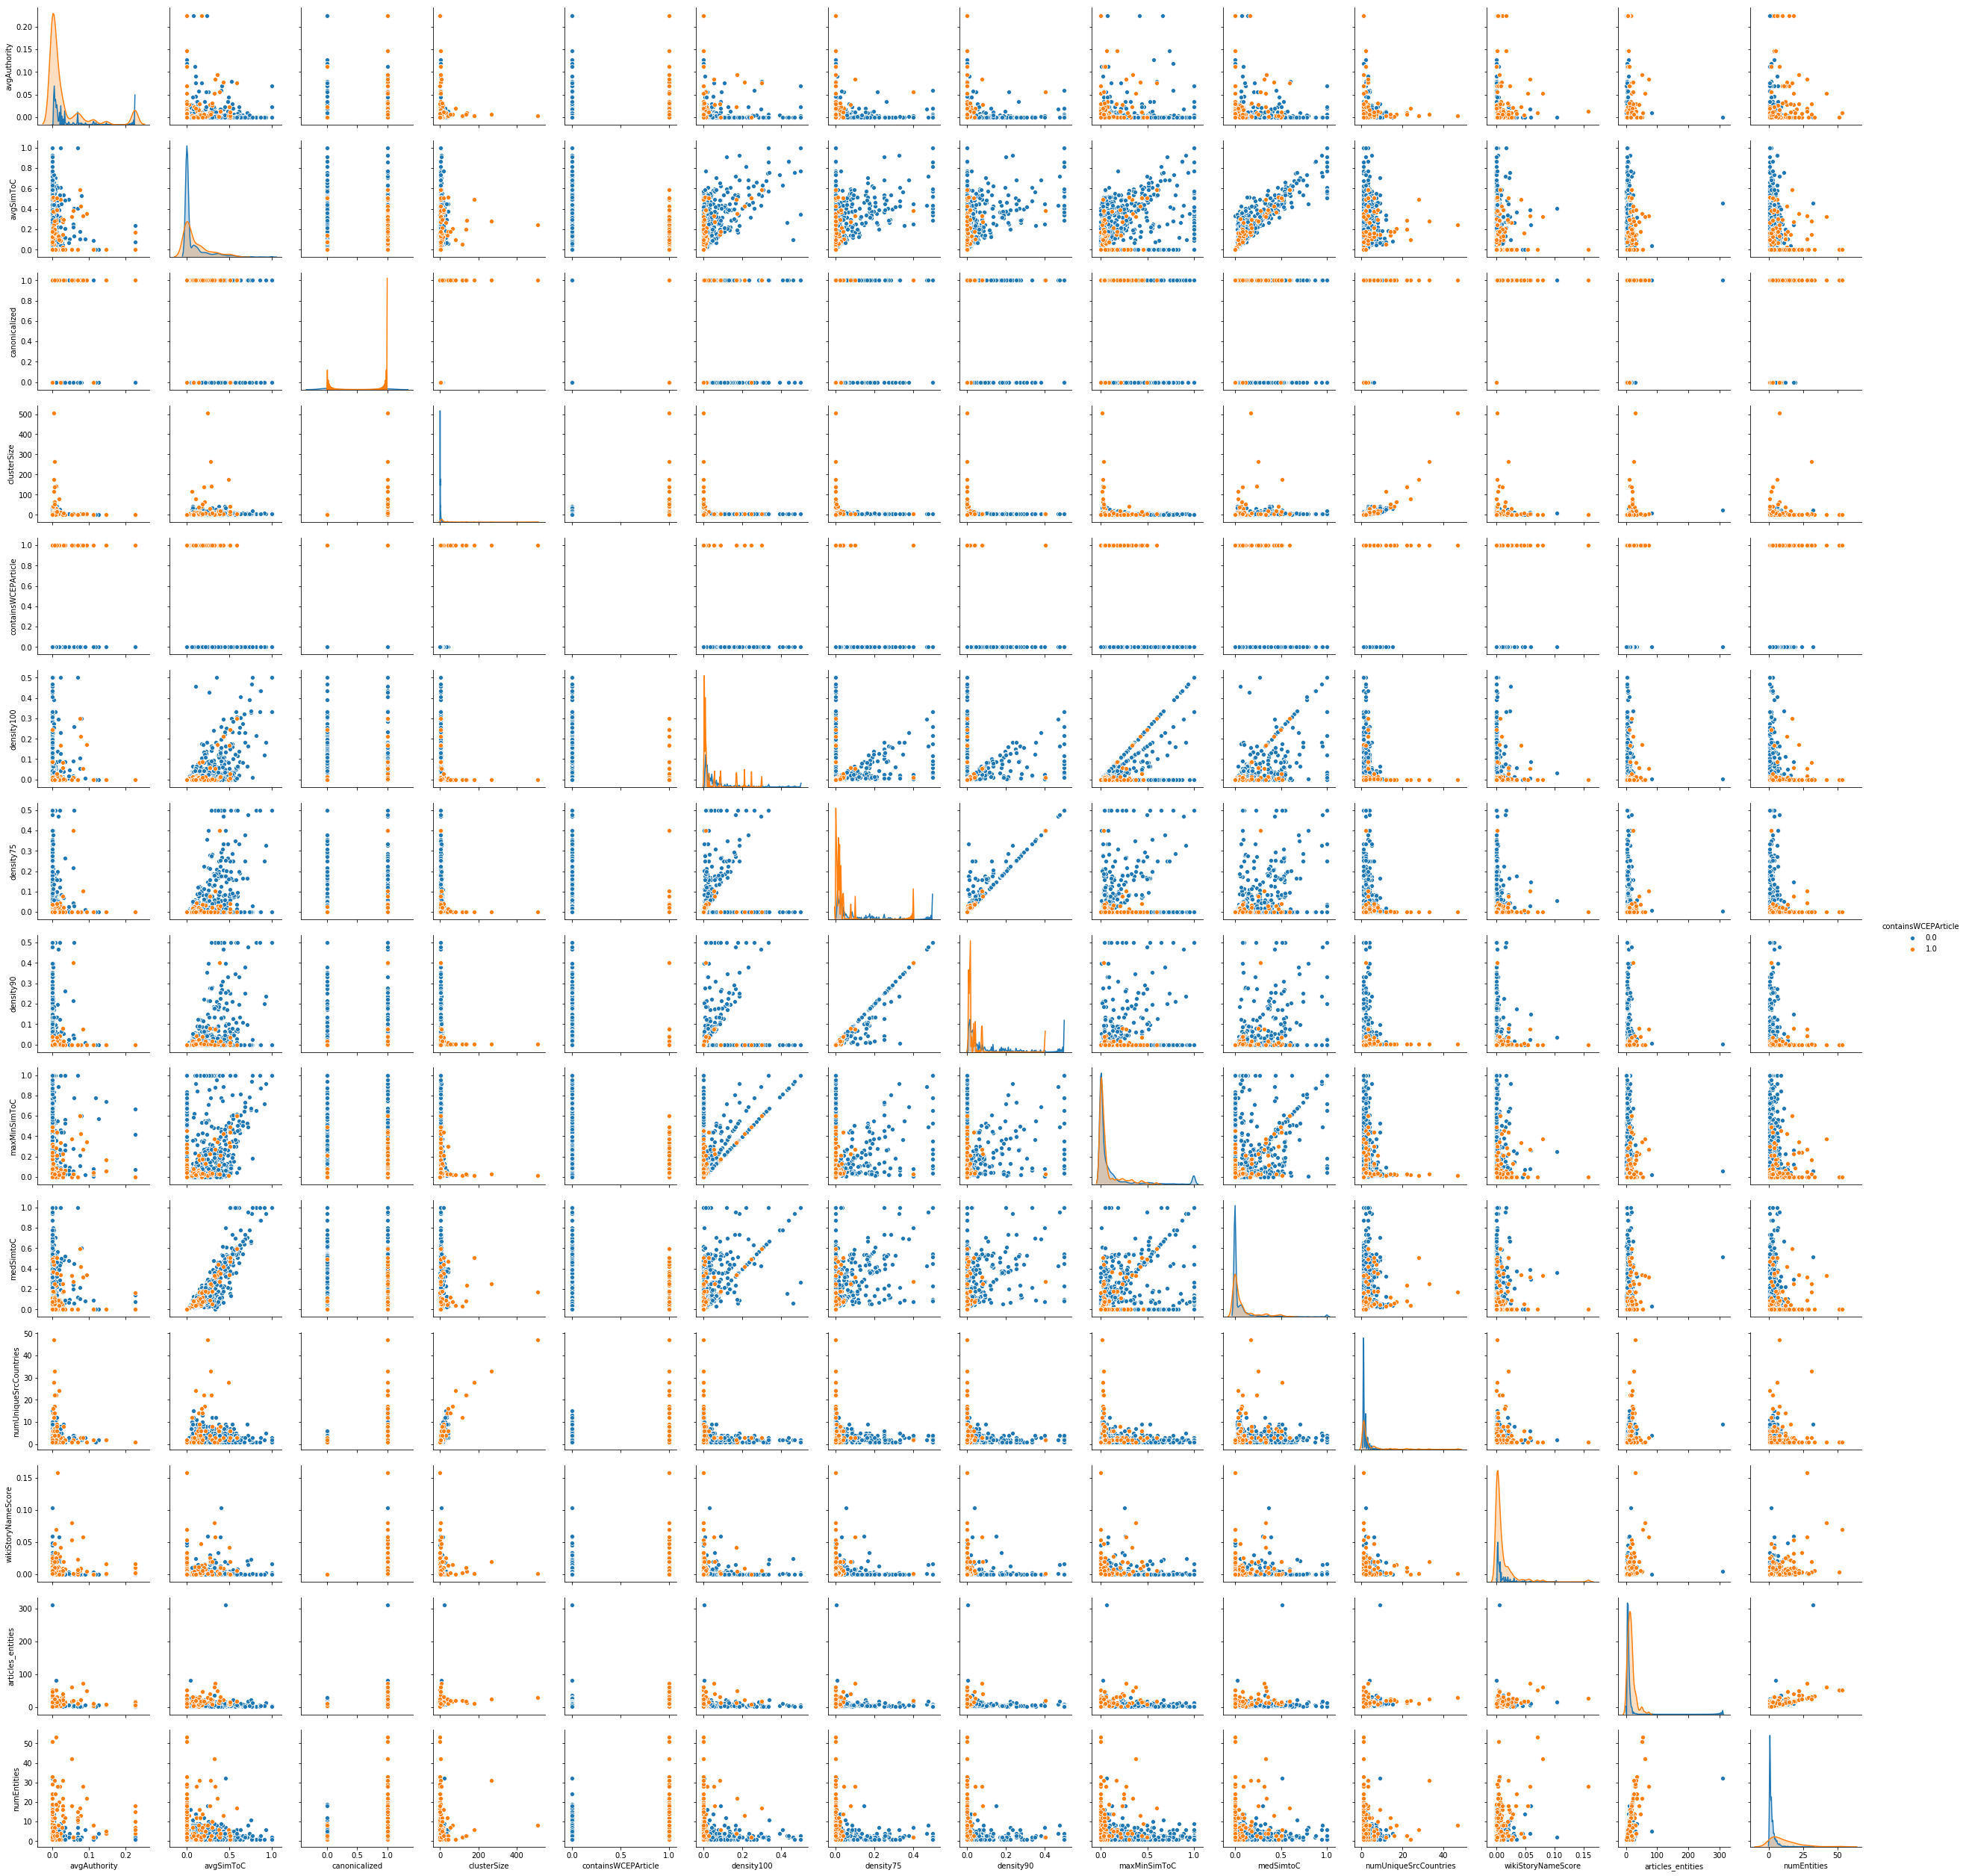

In [125]:
sns.pairplot(visualize, hue='containsWCEPArticle')

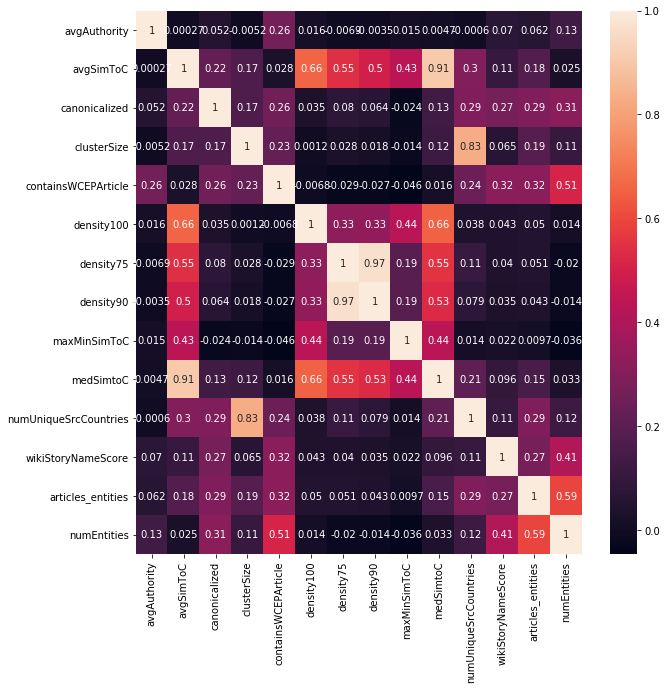

In [120]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
heat_map = sns.heatmap(visualize.corr(),annot=True, ax=ax)

In [122]:
heat_map.figure.savefig('heatmap.png')

## Seperating Data to check statistics

In [32]:
in_wcep = test_news.loc[test_news.containsWCEPArticle == 1]
not_in_wcep = test_news.loc[test_news.containsWCEPArticle == 0]


In [33]:
in_wcep.describe()

,avgAuthority,avgSimToC,canonicalized,clusterSize,clusterid,containsWCEPArticle,date,density100,density75,density90,maxMinSimToC,medSimtoC,numUniqueSrcCountries,wikiStoryNameScore,articles_entities,numEntities
count,16601.000000,16601.000000,16601.000000,16601.000000,1.660100e+04,16601.0,1.660100e+04,16601.000000,16601.000000,16601.000000,16601.000000,16601.000000,16601.000000,16601.000000,16601.000000,16601.000000
mean,0.019254,0.176129,0.888320,28.584483,1.394489e+11,1.0,2.013925e+07,0.012228,0.019476,0.014818,0.080344,0.132641,6.592374,0.009215,14.937499,6.787483
std,0.041977,0.164770,0.314982,61.463487,2.427746e+11,0.0,3.469282e+03,0.035187,0.051118,0.046296,0.128979,0.171014,7.518726,0.020900,15.101092,9.780360
min,0.000015,0.000000,0.000000,1.000000,2.013063e+08,1.0,2.013063e+07,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000015,0.042046,1.000000,2.000000,2.014042e+10,1.0,2.014033e+07,0.000000,0.000000,0.000000,0.017341,0.024845,2.000000,0.000398,7.783333,2.000000
50%,0.004367,0.137928,1.000000,7.000000,2.013093e+11,1.0,2.014060e+07,0.001101,0.002275,0.001192,0.033708,0.061538,4.000000,0.002286,12.184497,3.000000
75%,0.015040,0.273294,1.000000,27.000000,2.014061e+11,1.0,2.014083e+07,0.007578,0.014085,0.007889,0.079096,0.187821,9.000000,0.007961,18.124356,8.000000
max,0.225089,1.000000,1.000000,1140.000000,2.014122e+12,1.0,2.014123e+07,0.500000,0.500000,0.500000,1.000000,1.000000,57.000000,0.282968,488.441919,186.000000


In [34]:
not_in_wcep.describe()

,avgAuthority,avgSimToC,canonicalized,clusterSize,clusterid,containsWCEPArticle,date,density100,density75,density90,maxMinSimToC,medSimtoC,numUniqueSrcCountries,wikiStoryNameScore,articles_entities,numEntities
count,899922.000000,899922.000000,899922.000000,899922.000000,8.999220e+05,899922.0,8.999220e+05,899922.000000,899922.000000,899922.000000,899922.000000,899922.000000,899922.000000,899922.000000,899922.000000,899922.000000
mean,0.002776,0.103317,0.323306,3.899036,4.282319e+11,0.0,2.013996e+07,0.020885,0.019713,0.016931,0.139565,0.087256,1.847919,0.000861,4.076065,2.425920
std,0.015198,0.187792,0.467739,11.124379,6.264448e+11,0.0,2.818433e+03,0.069460,0.071603,0.067470,0.266822,0.200751,2.030015,0.004566,7.545500,3.467295
min,0.000015,0.000000,0.000000,1.000000,2.013070e+08,0.0,2.013070e+07,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000
25%,0.000015,0.000000,0.000000,1.000000,2.014041e+11,0.0,2.014051e+07,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.500000,1.000000
50%,0.000015,0.000000,0.000000,2.000000,2.014081e+11,0.0,2.014083e+07,0.000000,0.000000,0.000000,0.021164,0.000000,1.000000,0.000000,2.500000,2.000000
75%,0.000015,0.125550,1.000000,3.000000,2.014112e+11,0.0,2.014103e+07,0.003807,0.000000,0.000000,0.115652,0.075386,2.000000,0.000126,5.000000,3.000000
max,0.225089,1.000000,1.000000,871.000000,2.014123e+12,0.0,2.014123e+07,0.500000,0.500000,0.500000,1.000000,1.000000,59.000000,0.387648,772.852381,446.000000


In [35]:
len(not_in_wcep)

899922

In [265]:
file = [in_wcep, not_in_wcep[:200000]]

In [266]:
semi_set = pd.concat(file, axis=0, ignore_index=True)

#### Standardizing the data

In [276]:
semi_set.columns

Index(['articles', 'avgAuthority', 'avgSimToC', 'canonicalized', 'centroid',
       'clusterEntities', 'clusterSize', 'clusterid', 'containsWCEPArticle',
       'date', 'density100', 'density75', 'density90', 'maxMinSimToC',
       'medSimtoC', 'numUniqueSrcCountries', 'wikiStoryName',
       'wikiStoryNameScore', 'articles_entities', 'numEntities'],
      dtype='object')

In [320]:
data = semi_set.drop(['articles','centroid','wikiStoryName','clusterEntities',
                      'clusterid','date','containsWCEPArticle','density100','density90','density75',
                      'avgSimToC','maxMinSimToC','medSimtoC'], axis=1)
# data = semi_set[['avgAuthority','canonicalized','clusterSize',
#                   'numUniqueSrcCountries','wikiStoryNameScore','numEntities']]
label = semi_set.containsWCEPArticle
sc = StandardScaler()
X = sc.fit_transform(data)
label = label.as_matrix()

C:\Users\247987\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\247987\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\247987\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':


In [321]:
X_train, X_test, y_train, y_test = train_test_split(data, label, test_size = 0.30)

### Random Forest

In [325]:
from sklearn.ensemble import RandomForestClassifier
# random forest model creation
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train,y_train)
# predictions
rfc_predict = rfc.predict(X_test)

In [326]:
print(confusion_matrix(y_test, rfc_predict))

[[58895  1085]
 [ 2330  2671]]


In [327]:
print(classification_report(y_test, rfc_predict))

              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97     59980
         1.0       0.71      0.53      0.61      5001

   micro avg       0.95      0.95      0.95     64981
   macro avg       0.84      0.76      0.79     64981
weighted avg       0.94      0.95      0.94     64981



### SVM

In [328]:
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=0.025, random_state=101)
svm.fit(X_train,y_train)
y_pred = svm.predict(X_test)

In [329]:
confusion_matrix(y_test, y_pred)

array([[59774,   206],
       [ 4365,   636]], dtype=int64)

In [330]:
confusion_matrix(y_test, y_pred)

array([[59774,   206],
       [ 4365,   636]], dtype=int64)

In [331]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.93      1.00      0.96     59980
         1.0       0.76      0.13      0.22      5001

   micro avg       0.93      0.93      0.93     64981
   macro avg       0.84      0.56      0.59     64981
weighted avg       0.92      0.93      0.91     64981



### Tensorflow Classification

In [332]:
# X_train = tf.keras.utils.normalize(X_train,axis=1)
# X_test = tf.keras.utils.normalize(X_test,axis=1)


model = tf.keras.models.Sequential()
# model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(50, activation=tf.nn.relu,kernel_initializer='random_normal', input_dim=X_train.shape[1]))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu, kernel_initializer='random_normal'))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu, kernel_initializer='random_normal'))
model.add(tf.keras.layers.Dense(1, activation=tf.nn.sigmoid,kernel_initializer='random_normal'))

model.compile(optimizer='adam',
             loss= 'binary_crossentropy',
             metrics=['accuracy'])
fitting = model.fit(X_train,y_train, epochs=10)

Epoch 1/70
151620/151620 [==============================] - 8s 51us/sample - loss: 0.1694 - acc: 0.9357
Epoch 2/70
151620/151620 [==============================] - 7s 49us/sample - loss: 0.1563 - acc: 0.9392
Epoch 3/70
151620/151620 [==============================] - 7s 49us/sample - loss: 0.1518 - acc: 0.9410
Epoch 4/70
151620/151620 [==============================] - 7s 49us/sample - loss: 0.1501 - acc: 0.9418
Epoch 5/70
151620/151620 [==============================] - 7s 49us/sample - loss: 0.1488 - acc: 0.9428
Epoch 6/70
151620/151620 [==============================] - 8s 50us/sample - loss: 0.1480 - acc: 0.9429
Epoch 7/70
151620/151620 [==============================] - 8s 51us/sample - loss: 0.1473 - acc: 0.9436
Epoch 8/70
151620/151620 [==============================] - 7s 49us/sample - loss: 0.1474 - acc: 0.9439
Epoch 9/70
151620/151620 [==============================] - 8s 50us/sample - loss: 0.1467 - acc: 0.9440
Epoch 10/70
151620/151620 [==============================] - 8s 

In [333]:
val_loss, val_acc = model.evaluate(X_test,y_test)

64981/64981 [==============================] - 1s 21us/sample - loss: 0.1425 - acc: 0.9458


In [334]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 50)                400       
_________________________________________________________________
dense_13 (Dense)             (None, 128)               6528      
_________________________________________________________________
dense_14 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 129       
Total params: 23,569
Trainable params: 23,569
Non-trainable params: 0
_________________________________________________________________
None


In [335]:
y_pred=model.predict(X_test)
y_pred =(y_pred>0.5)

In [336]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[59247   733]
 [ 2788  2213]]


In [337]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97     59980
         1.0       0.75      0.44      0.56      5001

   micro avg       0.95      0.95      0.95     64981
   macro avg       0.85      0.72      0.76     64981
weighted avg       0.94      0.95      0.94     64981



### Logistic Regression

In [338]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

C:\Users\247987\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [339]:
confusion_matrix(y_test, y_pred)

array([[59399,   581],
       [ 3392,  1609]], dtype=int64)

In [340]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97     59980
         1.0       0.73      0.32      0.45      5001

   micro avg       0.94      0.94      0.94     64981
   macro avg       0.84      0.66      0.71     64981
weighted avg       0.93      0.94      0.93     64981



In [9]:
######################################################################
############## END HERE #########################################